In [1]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import io
import html
import time

In [2]:
%cd /content/drive/MyDrive/DLCV_workshop/Assessment

/content/drive/MyDrive/DLCV_workshop/Assessment


In [3]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [4]:
def displayImage(image):
    if len(image.shape)==3:
        color_coverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize = (20,8))
        plt.imshow(color_coverted)
        plt.show()
        
    else:
        plt.figure(figsize = (20,8))
        plt.imshow(image, cmap="gray")
        plt.show()

(480, 640, 3)
Point 1 = ( 230 , 146 )
Point 2 = ( 422 , 338 )


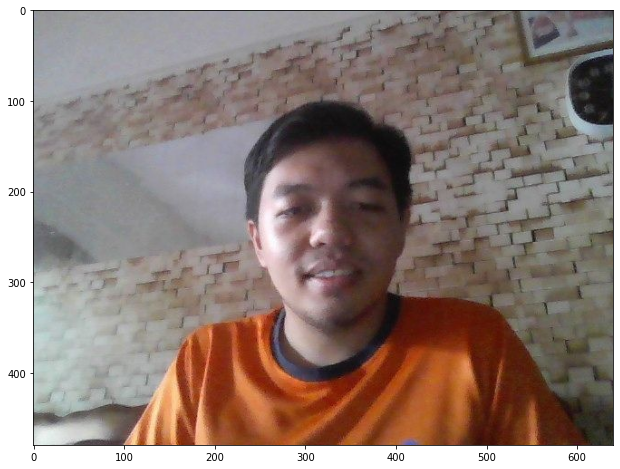

In [28]:
img = cv2.imread("photo1.jpg", cv2.IMREAD_COLOR)
print(img.shape)

# get face bounding box coordinates using Haar Cascade
faces = face_cascade.detectMultiScale(img)

# draw face bounding box on image
for (x,y,w,h) in faces:
      #img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
      x1 = x
      y1 = y
      x2 = x+w
      y2 = y+h
      #print("Point 1 = (", x1, ",", y1, ")")
      #print("Point 2 = (", x2, ",", y2, ")")

print("Point 1 = (", x1, ",", y1, ")")
print("Point 2 = (", x2, ",", y2, ")")
displayImage(img)

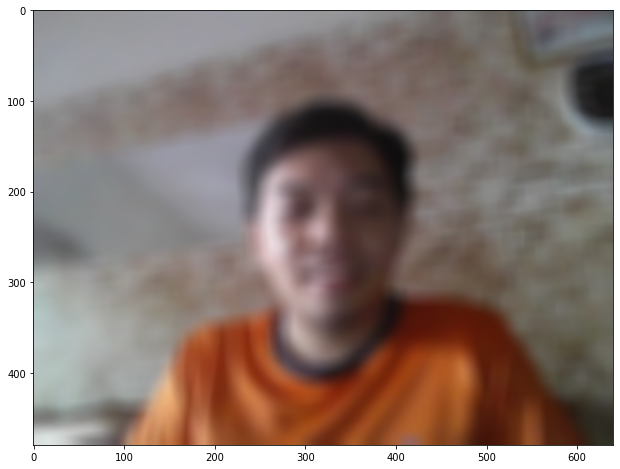

In [29]:
imgBlur = cv2.GaussianBlur(img,(21,21),200)
displayImage(imgBlur)

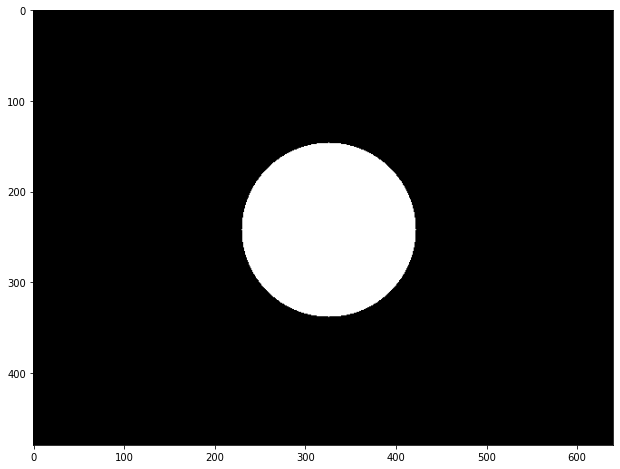

(480, 640, 3)

In [30]:
mask = np.zeros(img.shape, dtype=np.uint8)
px = int(x1+((x2-x1)/2))
py = int(y1+((y2-y1)/2))
rad = int((y2-y1)/2)
mask = cv2.circle(mask,(px,py),rad,(255,255,255),-1)
displayImage(mask)
mask.shape

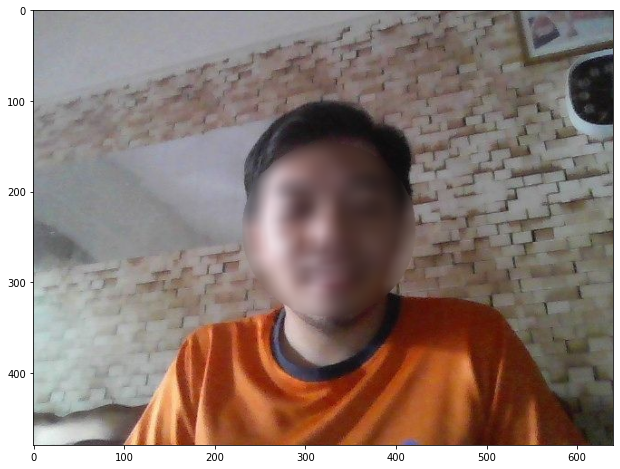

True

In [31]:
out = np.where(mask==np.array([0, 0, 0]), img, imgBlur)
displayImage(out)
cv2.imwrite("photo1blur.jpg", out)